# Galvanize Probability Sprint Solutions
This is the auxiliary material for the basic part of the solution.

In [113]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Part 1: Identifying Distributions

#### 1. A typist makes on average 2 mistakes per page.  What is the probability of a particular page having no errors on it?


In [99]:
# The mistakes are Poisson distributed with a parameter of 2.
# X ~ Poisson(2)
# P(X = 0)
# = (2 ^ 0 / 0!) * e ^ -2
# ~= 0.135

dist = stats.poisson(mu=2)
print("P(X = 0) = ", dist.pmf(0))

P(X = 0) =  0.1353352832366127


#### 2. Components are packed in boxes of 20. The probability of a component being defective is 0.1. What is the probability of a box containing exactly 2 defective components?

In [100]:
# The defects are binomially distributed with n=20 and p=.1
#X ~ Binomial(n=20, p=0.1)

   #P(X = 2)
   # 20 C 2 is 20 choose 2
   #= (20 C 2) * (0.1 ^ 2) * (1 - 0.1) ^ 18
   #= (20! / 2! * 18!) * (0.1 ^ 2) * (1 - 0.1) ^ 18
   #~= 0.285

dist = stats.binom(20, 0.1)
print ("P(X = 2) = ", dist.pmf(2))


P(X = 2) =  0.28517980706429813


#### 3. Components are packed in boxes of 20. The probability of any individual component being defective is 0.1. What is the probability of a box containing AT MOST 2 defective components?

In [13]:
# This is the same as above but now we have to calculate the probability of having 0, 1, or 2 defects.
# The scipy solution is starting to look easier!

#X ~ Binomial(n=20, p=0.1)
# P(X <= 2)
# = P(X == 0) + P(X == 1) + P(X == 2)
# =   (20 C 0) * (0.1 ^ 0) * (1 - 0.1) ^ 20
#  + (20 C 1) * (0.1 ^ 1) * (1 - 0.1) ^ 19
#  + (20 C 2) * (0.1 ^ 2) * (1 - 0.1) ^ 18
# ~= 0.677

dist = stats.binom(20, 0.1)
print ("P(X < 2) = ", dist.cdf(2))


P(X < 2) =  0.6769268051894661


#### 4. Patrons arrive at a local bar at a rate of 30 per hour. What is the probability that the bouncer can take a three minute bathroom break without missing the next patron?

In [20]:
#Possion 30 hour equals .5/minute.  Since we want to look at a 3 minute time period, 
# we use 1.5 per 3 minutes.  That gives us a lambda of 1.5.

# X ~ Poisson(1.5)
# P(X = 0)
# = (1.5 ^ 0 / 0!) * e ^ -1.5
# ~= 0.223

dist = stats.poisson(mu=1.5)
print("P(X = 0) = ", dist.pmf(0))


P(X = 0) =  0.22313016014842982


In [22]:
# OR We could use an exponential distribution and get the same answer!  Why is that? 
#X = waiting time
#X ~ Exponential(0.5)  # 30 per hour = 0.5 per minute

#P(X > 3)
#= 1 - P(X <= 3)
#= 1 - (1 - exp(-0.5 * 3))
#~= 0.2231

dist = stats.expon(scale=1/.5)
print("P(X = 0) = ", 1-dist.cdf(3))



P(X = 0) =  0.2231301601484298


####  5.You need to find a tall person, at least 6 feet tall, to help you reach a cookie jar. 8% of the population is 6 feet or taller, and people pass by on average twice per minute. If you wait on the sidewalk, what is the probability that you will have to wait longer than ten minutes to get some cookies?

In [24]:
# The waiting time is exponentially distributed.
# The rate that the event "someone of sufficient height passes by"
# happens is:
#  rate = 2 persons / 1 min * 8 tall persons / 100 persons
#       = 0.16 tall persons / min

#X ~ Exponential(rate = 0.16)

# P(X > 10 min)
# = 1 - P(X <= 10 min)
# = 1 - (1 - exp(- 0.16 * 10))
# = exp(- 0.16 * 10)
# ~= 0.201

dist = stats.expon(scale=1/.16)
print("P(X > 10) = ", 1-dist.cdf(10))

P(X > 10) =  0.20189651799465536


#### 6. A harried passenger will be several minutes late for a scheduled 10 A.M. flight to NYC. Nevertheless, he might still make the flight, since boarding is always allowed until 10:10 A.M., and boarding is sometimes permitted up to 10:30 AM.

#### Assuming the end time of the boarding interval is uniformly distributed over the above limits, find the probability that the passenger will make his flight, assuming he arrives at the boarding gate at 10:25.

In [26]:
#X ~ Uniform(10, 30) # Really uniform over 10:10 to 10:30

#P(X > 25)
#= (30 - 25) / (30 - 10) = 0.25

dist = stats.uniform(loc=10, scale=20)
print("P(X > 10) = ", 1-dist.cdf(25))

P(X > 10) =  0.25


#### 7. Your cat starts to beg for dinner at 3:30 every day, and you suspect that it meows at a fixed rate. You've observed that about one fifth of the time, your cat will not meow until 3:40, giving you ten unexpected minutes of quiet. What is the probability your cat leaves you alone until 4:00?

In [29]:
# Looks like this one is Poisson distributed, but we are not 
# directly given the rate, so we'll have to figure it out.
# X = # of meows in a ten mins
# X ~ Poisson(lambda=???)

# But here's what we do know:
# P(X == 0) = 0.2
# On the other hand, since X is Poisson distributed:
# P(X == 0) = exp(- lambda)
# So, solving the resulting equation
# lambda = - log(0.2) = 1.6

# So the rate our cat is meowing is (approximately) 1.6 meows / 10 min
# Now we can actually solve the problem.  We want:
# P(Cat does not meow between 3:30 and 4:00)
# Which is a 30 min interval.  So let's get the rate the cat meows
# in every 30 mins
# lambda = 1.6 meows / 10 min = 4.8 meows / 30 min
# Now we can calculate the needed probability
# P(Your cat leaves you alone until 4:00)
# = P(Your cat meows 0 times in 30 mins)
# = exp(- 4.8)
# ~= 0.008

dist = stats.poisson(mu = 4.8)
print ("P(X = 0)", dist.pmf(0))

P(X = 0) 0.00822974704902003


#### 8. Somehow you ended up with two types of forks. There are the good forks, which are big and fit a healthy bite, but there are also these small, thin ones that you don't really understand what they are for, you should probably just get rid of them. You need two forks for you and your partner, and grab a fistful of 5. If there are 14 forks in the drawer, of which half are the good kind, what is the probability you have at least your two required good forks?


In [30]:
# The number of good forks in hand is Hypergeometrically distributed.
# X = # of good forks in a hand of 5.
# X ~ Hypergeometric(N=14, k=7, n=5)

# P(X >= 2)
# = 1 - P(X <= 1)

dist = stats.hypergeom(M=14, N=5, n=7)
print ("P(X >= 2) = ", 1-dist.cdf(1))

P(X >= 2) =  0.867132867132867





## PART 2: Distribution Simulation

#### 1. Profit = Number of views * Conversion * (Wholesale_Proportion * 50 + (1 - Wholesale_Proportion)*60)

#### Number of views is a uniform distribution over the range of 5000 and 6000.
#### Conversion is binomially distributed where the probability of success is 0.12 for each view.
#### Profit per sale can take on two values: 50 for wholesale and 60 for non-wholesale. There is a 0.2 probability of a sale being wholesale and 0.8 probability of being non-wholesale. You should be able to model both the number of wholesale sales and the number of non-wholesales sales as binomial distributions (but one of the parameters of this distribution is not fixed, it depends on an earlier random quantity).



In [36]:
# Here's the function.  Note how first we sample a uniform distribution to get the number of views.
# Then, we use that value we just got for number of views as the parameter for the conversions distribution!
# We then use that value as the parameter for the profit function.
# Note that we are not encorporating num_views or conversions into the profit calculation. 
# We already used them for the distribuions!

def profit_rvs():
    num_views = int(stats.uniform(loc=5000, scale=1000).rvs())
    conversions = stats.binom(p=0.12, n=num_views).rvs()
    wholesales = stats.binom(p=0.2, n=conversions).rvs()
    non_wholesales = conversions - wholesales
    profit = (wholesales * 50 + non_wholesales * 60)
    return profit

#### 2. Draw 10,000 samples from the distribution of profit, and plot a histogram. Does it look like any of the common distributions is a good fit for profit?


In [102]:
samples = [profit_rvs() for _ in range(10000)]

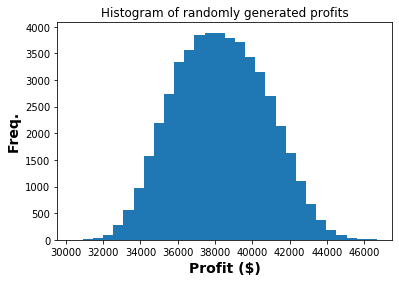

In [116]:
# Looking pretty normal to me!
# Why might that be?  You may not have gotten to it yet, but it's the central limit theorem!
fig, ax = plt.subplots()
ax.hist(samples, bins=30)
ax.set_xlabel('Profit ($)', fontsize=14, fontweight='bold')
ax.set_ylabel('Freq.', fontsize=14, fontweight='bold')
ax.set_title("Histogram of randomly generated profits")
print()

####  3. Compute the range of values of profit where the middle 95% of the probability mass lies.

In [117]:
print ('2.5% percentile: ', np.percentile(samples, 2.5))
print ('97.5% percentile: ', np.percentile(samples, 97.5))

2.5% percentile:  33810.0
97.5% percentile:  42950.0
